In [10]:
import torch
print("PyTorch version:", torch.__version__)
print("Is CUDA available? ->", torch.cuda.is_available())

# Import the YOLO class from the ultralytics package.
from ultralytics import YOLO
print("Setup complete. YOLOv8 is ready to use!")

PyTorch version: 2.5.1+cu118
Is CUDA available? -> True
Setup complete. YOLOv8 is ready to use!


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [14]:
import os

#  Change the working directory !!!!!!!!!!!
datasets_dir = r"C:\mlearning\datasets"
os.chdir(datasets_dir)  # Now Python will consider this the current directory
print("Current working directory:", os.getcwd())

#  YAML content: update `nc` if you have more classes.
yaml_text = """
train: yolo_split_data/train/images
val: yolo_split_data/val/images
test: yolo_split_data/test/images

nc: 2
names:
  0: "gesture_class0"
  1: "gesture_class1"
"""

#  Create the gesture_data.yaml file in this directory
with open("gesture_data.yaml", "w", encoding="utf-8") as f:
    f.write(yaml_text.strip())

print("gesture_data.yaml file created in C:\\mlearning\\datasets!")



Current working directory: C:\mlearning\datasets
gesture_data.yaml file created in C:\mlearning\datasets!


In [15]:
# Load a pretrained YOLOv8 model. "yolov8n.pt" is the nano version (smallest).

model = YOLO("yolov8n.pt")
print("YOLOv8 model (nano) loaded successfully.")



YOLOv8 model (nano) loaded successfully.


In [5]:
# Force GPU usage (assuming device=0 is your RTX 4060),
# increase batch size if your VRAM allows, and set more workers for faster data loading.

results = model.train(
    data="gesture_data.yaml",     # Path to the YAML file
    epochs=50,                    # Number of epochs
    batch=32,                     # Increase if you have enough VRAM (e.g., try 32)
    imgsz=640,                    # Image size
    name="gesture_exp",           # Experiment name
    project="GestureProject",     # Main folder for logs/weights
    patience=5,                   # Early stopping after 5 epochs with no improvement
    verbose=True,                 # Show detailed logs
    device=0,                     # Force GPU device (e.g., 'cuda:0')
    workers=8,                    # Number of CPU workers to load data in parallel
    amp=True                      # Automatic Mixed Precision (faster with minimal accuracy loss)
)
print("Training is complete!")


Ultralytics 8.3.52  Python-3.12.7 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=gesture_data.yaml, epochs=50, time=None, patience=5, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=GestureProject, name=gesture_exp, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

train: Scanning C:\mlearning\datasets\yolo_split_data\train\labels.cache... 7948 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7948/7948 [00:00<?, ?it/s]
val: Scanning C:\mlearning\datasets\yolo_split_data\val\labels.cache... 2407 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2407/2407 [00:00<?, ?it/s]


Plotting labels to GestureProject\gesture_exp\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to GestureProject\gesture_exp
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.12G      1.247      2.047       1.12         27        640: 100%|██████████| 249/249 [01:05<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:17<00:00,  2.11it/s]


                   all       2407       2407      0.837       0.81      0.838      0.596

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.14G      1.017     0.9656      1.009         20        640: 100%|██████████| 249/249 [01:05<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:16<00:00,  2.34it/s]

                   all       2407       2407      0.848      0.858      0.874      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50       4.1G     0.9781     0.8032     0.9937         16        640: 100%|██████████| 249/249 [01:12<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:16<00:00,  2.27it/s]


                   all       2407       2407      0.845      0.838      0.884       0.66

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.11G     0.9639     0.7584     0.9978         17        640: 100%|██████████| 249/249 [01:04<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:14<00:00,  2.62it/s]

                   all       2407       2407       0.82      0.882      0.895      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       4.1G     0.9275     0.7009     0.9796         21        640: 100%|██████████| 249/249 [01:05<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:14<00:00,  2.60it/s]

                   all       2407       2407       0.85       0.88      0.921      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.11G     0.9019     0.6663     0.9711         19        640: 100%|██████████| 249/249 [01:05<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:14<00:00,  2.61it/s]

                   all       2407       2407      0.863      0.906      0.927      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       4.1G     0.8786     0.6401     0.9631         23        640: 100%|██████████| 249/249 [01:06<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:14<00:00,  2.67it/s]

                   all       2407       2407      0.861       0.91      0.936      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.11G     0.8718     0.6321     0.9618         26        640: 100%|██████████| 249/249 [01:07<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:14<00:00,  2.60it/s]

                   all       2407       2407      0.853      0.916      0.942      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       4.1G     0.8545     0.6129     0.9567         20        640: 100%|██████████| 249/249 [01:06<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:15<00:00,  2.47it/s]

                   all       2407       2407      0.839      0.933      0.939      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.11G     0.8354     0.5971      0.951         19        640: 100%|██████████| 249/249 [01:20<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.18it/s]

                   all       2407       2407      0.877      0.892       0.94      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       4.1G      0.836     0.5911     0.9485         22        640: 100%|██████████| 249/249 [01:28<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.23it/s]

                   all       2407       2407      0.869      0.891      0.942      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.11G     0.8135     0.5757     0.9444         20        640: 100%|██████████| 249/249 [01:25<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.21it/s]


                   all       2407       2407      0.877      0.884      0.943      0.768

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       4.1G     0.7977     0.5578     0.9378         13        640: 100%|██████████| 249/249 [01:24<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:12<00:00,  3.07it/s]

                   all       2407       2407      0.857      0.916      0.949      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.11G     0.7985     0.5634     0.9364         19        640: 100%|██████████| 249/249 [01:21<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:16<00:00,  2.24it/s]

                   all       2407       2407      0.851      0.934      0.952      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50       4.1G      0.789     0.5566     0.9313         22        640: 100%|██████████| 249/249 [01:14<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:16<00:00,  2.33it/s]

                   all       2407       2407      0.864      0.931      0.957      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.11G     0.7877     0.5385       0.93         25        640: 100%|██████████| 249/249 [01:13<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:14<00:00,  2.57it/s]

                   all       2407       2407      0.871      0.921      0.956       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       4.1G     0.7818     0.5489     0.9309         35        640: 100%|██████████| 249/249 [01:11<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:14<00:00,  2.58it/s]

                   all       2407       2407      0.879       0.92      0.957      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.11G     0.7753     0.5367     0.9288         21        640: 100%|██████████| 249/249 [01:09<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:16<00:00,  2.25it/s]

                   all       2407       2407       0.85      0.939      0.956      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50       4.1G     0.7701     0.5262     0.9281         30        640: 100%|██████████| 249/249 [01:17<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:16<00:00,  2.29it/s]

                   all       2407       2407      0.847       0.95       0.95      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.11G     0.7579     0.5209     0.9219         13        640: 100%|██████████| 249/249 [01:10<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:14<00:00,  2.62it/s]

                   all       2407       2407      0.876      0.911      0.955      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       4.1G     0.7601     0.5207     0.9229         26        640: 100%|██████████| 249/249 [01:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:15<00:00,  2.39it/s]

                   all       2407       2407      0.868      0.921      0.959      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.11G     0.7482      0.516     0.9176         18        640: 100%|██████████| 249/249 [01:07<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:15<00:00,  2.52it/s]

                   all       2407       2407      0.868      0.927      0.955      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50       4.1G     0.7475     0.5132     0.9189         25        640: 100%|██████████| 249/249 [01:09<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:14<00:00,  2.58it/s]

                   all       2407       2407      0.858      0.934      0.955      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.11G     0.7333      0.497     0.9135         18        640: 100%|██████████| 249/249 [01:06<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.28it/s]

                   all       2407       2407      0.881      0.927      0.959      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       4.1G     0.7349      0.493      0.914         15        640: 100%|██████████| 249/249 [01:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.32it/s]

                   all       2407       2407      0.869      0.928      0.958        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.11G      0.721      0.488     0.9102         28        640: 100%|██████████| 249/249 [01:20<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.54it/s]

                   all       2407       2407      0.877      0.919       0.96      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50       4.1G       0.73     0.4943     0.9109         25        640: 100%|██████████| 249/249 [01:20<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]

                   all       2407       2407      0.879      0.918      0.959      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.11G      0.716     0.4822     0.9097         17        640: 100%|██████████| 249/249 [01:19<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]

                   all       2407       2407      0.867      0.934       0.96      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.1G     0.7129     0.4806     0.9072         24        640: 100%|██████████| 249/249 [01:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.38it/s]

                   all       2407       2407      0.869      0.934       0.96      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.11G     0.7108     0.4792       0.91         21        640: 100%|██████████| 249/249 [01:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.39it/s]

                   all       2407       2407      0.874      0.926       0.96       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       4.1G     0.7048     0.4686     0.9049         13        640: 100%|██████████| 249/249 [01:21<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.44it/s]

                   all       2407       2407      0.875       0.93       0.96      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.11G     0.6967     0.4655     0.9047         16        640: 100%|██████████| 249/249 [01:21<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.26it/s]

                   all       2407       2407      0.883      0.922      0.958      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50       4.1G     0.6983     0.4655     0.9008         16        640: 100%|██████████| 249/249 [01:20<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]

                   all       2407       2407       0.89      0.913      0.961      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.11G     0.6933     0.4615     0.9004         22        640: 100%|██████████| 249/249 [01:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.45it/s]

                   all       2407       2407      0.889      0.922      0.962      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       4.1G     0.6766     0.4515     0.8967         23        640: 100%|██████████| 249/249 [01:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.40it/s]

                   all       2407       2407      0.881      0.928      0.961      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.11G     0.6808     0.4445     0.8964         18        640: 100%|██████████| 249/249 [01:19<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.43it/s]

                   all       2407       2407      0.859      0.946       0.96      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50       4.1G     0.6702     0.4361     0.8914         19        640: 100%|██████████| 249/249 [01:21<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.38it/s]

                   all       2407       2407      0.877      0.939      0.963      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.11G     0.6706     0.4385     0.8917         19        640: 100%|██████████| 249/249 [01:19<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.51it/s]

                   all       2407       2407      0.887      0.921      0.962      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50       4.1G     0.6657     0.4318     0.8922         20        640: 100%|██████████| 249/249 [01:19<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.31it/s]

                   all       2407       2407      0.883       0.93      0.963      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.11G     0.6646     0.4312     0.8924         13        640: 100%|██████████| 249/249 [01:18<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]

                   all       2407       2407       0.89      0.922      0.964      0.821


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50       4.1G     0.6141     0.3723     0.8718         12        640: 100%|██████████| 249/249 [01:11<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.44it/s]

                   all       2407       2407      0.871      0.937      0.963      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.11G      0.605      0.361     0.8706         12        640: 100%|██████████| 249/249 [01:12<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.59it/s]


                   all       2407       2407      0.874      0.935      0.965      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       4.1G     0.5974     0.3567     0.8688         12        640: 100%|██████████| 249/249 [01:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.33it/s]

                   all       2407       2407       0.87      0.942      0.962      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.11G     0.5846     0.3477     0.8648         12        640: 100%|██████████| 249/249 [01:18<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]

                   all       2407       2407      0.862      0.942      0.963      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       4.1G     0.5859     0.3489     0.8652         12        640: 100%|██████████| 249/249 [01:17<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.49it/s]

                   all       2407       2407      0.882      0.925      0.965      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.11G     0.5811     0.3401     0.8647         12        640: 100%|██████████| 249/249 [01:18<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.52it/s]

                   all       2407       2407      0.884       0.93      0.963      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50       4.1G     0.5719     0.3312     0.8589         12        640: 100%|██████████| 249/249 [01:19<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:11<00:00,  3.42it/s]

                   all       2407       2407      0.878       0.93      0.962      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.11G     0.5718     0.3263     0.8594         12        640: 100%|██████████| 249/249 [01:20<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.66it/s]

                   all       2407       2407      0.881      0.927      0.964      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       4.1G     0.5619     0.3208     0.8522         12        640: 100%|██████████| 249/249 [01:18<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.58it/s]

                   all       2407       2407      0.871      0.934      0.962      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.11G     0.5587     0.3163     0.8565         12        640: 100%|██████████| 249/249 [01:18<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:10<00:00,  3.56it/s]

                   all       2407       2407      0.881      0.927      0.961      0.827



50 epochs completed in 1.303 hours.
Optimizer stripped from GestureProject\gesture_exp\weights\last.pt, 6.2MB
Optimizer stripped from GestureProject\gesture_exp\weights\best.pt, 6.2MB

Validating GestureProject\gesture_exp\weights\best.pt...
Ultralytics 8.3.52  Python-3.12.7 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:13<00:00,  2.79it/s]


                   all       2407       2407      0.881      0.927      0.964      0.828
        gesture_class0       1188       1188      0.892      0.935      0.973      0.864
        gesture_class1       1219       1219      0.869      0.919      0.954      0.792
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to GestureProject\gesture_exp
Training is complete!


In [16]:
# Load the best model after training
model = YOLO("GestureProject/gesture_exp/weights/best.pt")
print("Model loaded from best.pt successfully!")



Model loaded from best.pt successfully!


In [17]:
# Validate the best model on the validation set
val_results = model.val(
    data="gesture_data.yaml",
    imgsz=640,
    batch=16,
    conf=0.25,
    plots=True  # Generates confusion matrix and PR curve
)

print("Validation results:", val_results)


Ultralytics 8.3.52  Python-3.12.7 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
Model summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\mlearning\datasets\yolo_split_data\val\labels.cache... 2407 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2407/2407 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 151/151 [00:16<00:00,  9.05it/s]


                   all       2407       2407       0.88      0.925      0.948      0.828
        gesture_class0       1188       1188       0.89      0.933      0.956      0.858
        gesture_class1       1219       1219       0.87      0.918       0.94      0.799
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs\detect\val3
Validation results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000013AE2591EE0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.01

In [18]:
# Test the best model on the test set
test_results = model.val(
    data="gesture_data.yaml",
    imgsz=640,
    batch=16,
    split="test"  # Explicitly use the test split
)

print("Test results:", test_results)


Ultralytics 8.3.52  Python-3.12.7 torch-2.5.1+cu118 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)


val: Scanning C:\mlearning\datasets\yolo_split_data\test\labels.cache... 1215 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1215/1215 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 76/76 [00:09<00:00,  8.05it/s]


                   all       1215       1215      0.899      0.914       0.96      0.827
        gesture_class0        605        605      0.924      0.932      0.977      0.871
        gesture_class1        610        610      0.875      0.895      0.943      0.784
Speed: 0.3ms preprocess, 2.2ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\val4
Test results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000013AF80C9400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018, 

In [21]:
# Extract metrics from the test results
metrics = test_results.results_dict
# Print the full results_dict to identify available keys
print("Available keys in results_dict:", test_results.results_dict.keys())
print("Full results_dict content:", test_results.results_dict)


Available keys in results_dict: dict_keys(['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'fitness'])
Full results_dict content: {'metrics/precision(B)': 0.8992811669016747, 'metrics/recall(B)': 0.9136566860858962, 'metrics/mAP50(B)': 0.9599571871404933, 'metrics/mAP50-95(B)': 0.8274713215905729, 'fitness': 0.840719908145565}


In [24]:
# Print the test metrics
print(f"Precision: {metrics['metrics/precision(B)']:.3f}")
print(f"Recall: {metrics['metrics/recall(B)']:.3f}")
print(f"mAP50: {metrics['metrics/mAP50(B)']:.3f}")
print(f"mAP50-95: {metrics['metrics/mAP50-95(B)']:.3f}")
print(f"F1-Score (Fitness): {metrics['fitness']:.3f}")



Precision: 0.899
Recall: 0.914
mAP50: 0.960
mAP50-95: 0.827
F1-Score (Fitness): 0.841
Accuracy (Precision * Recall): 0.822


In [25]:
# Calculate Accuracy
# Accuracy is approximated as (Precision * Recall)
accuracy = metrics['metrics/precision(B)'] * metrics['metrics/recall(B)']
print(f"Accuracy (Precision * Recall): {accuracy:.3f}")

Accuracy (Precision * Recall): 0.822


In [26]:
import pandas as pd

# Load the results.csv file
results_path = "GestureProject/gesture_exp/results.csv"
results_df = pd.read_csv(results_path)

# Print the column names to identify available metrics
print("Available columns in results.csv:")
print(results_df.columns)


Available columns in results.csv:
Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


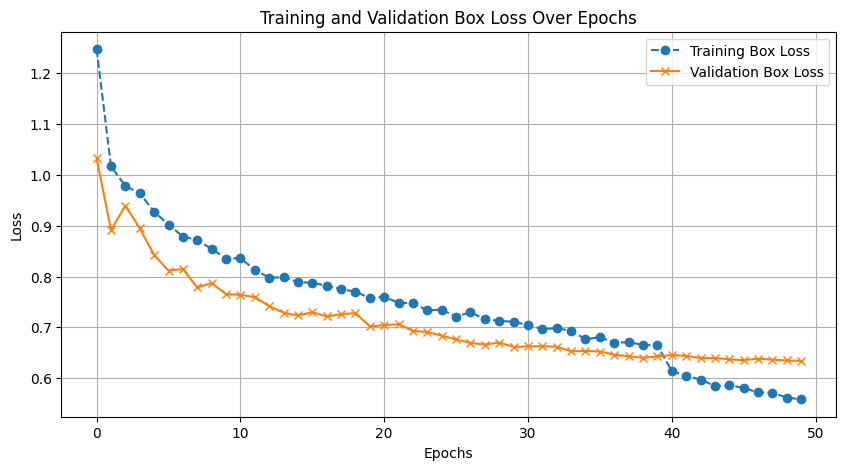

In [32]:
# Extract the relevant loss columns
%matplotlib inline

train_loss = results_df["train/box_loss"]  # Training loss (box regression loss)
val_loss = results_df["val/box_loss"]      # Validation loss (box regression loss)

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label="Training Box Loss", linestyle='--', marker='o')
plt.plot(val_loss, label="Validation Box Loss", linestyle='-', marker='x')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Box Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


In [30]:
# Extract classification and DFL losses
train_cls_loss = results_df["train/cls_loss"]  # Training classification loss
val_cls_loss = results_df["val/cls_loss"]      # Validation classification loss
train_dfl_loss = results_df["train/dfl_loss"]  # Training DFL loss
val_dfl_loss = results_df["val/dfl_loss"]      # Validation DFL loss

# Plot classification loss
plt.figure(figsize=(10, 5))
plt.plot(results_df["epoch"], train_cls_loss, label="Training Classification Loss", linestyle='--', marker='o')
plt.plot(results_df["epoch"], val_cls_loss, label="Validation Classification Loss", linestyle='-', marker='x')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Classification Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()

# Plot DFL loss
plt.figure(figsize=(10, 5))
plt.plot(results_df["epoch"], train_dfl_loss, label="Training DFL Loss", linestyle='--', marker='o')
plt.plot(results_df["epoch"], val_dfl_loss, label="Validation DFL Loss", linestyle='-', marker='x')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation DFL Loss Over Epochs")
plt.legend()
plt.grid()
plt.show()


<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

In [27]:
# Extract key metrics
precision = results_df["metrics/precision(B)"].iloc[-1]  # Last epoch precision
recall = results_df["metrics/recall(B)"].iloc[-1]        # Last epoch recall
map50 = results_df["metrics/mAP50(B)"].iloc[-1]          # Last epoch mAP50
map50_95 = results_df["metrics/mAP50-95(B)"].iloc[-1]    # Last epoch mAP50-95

# Print metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"mAP50: {map50:.3f}")
print(f"mAP50-95: {map50_95:.3f}")

# Calculate Accuracy (Precision * Recall)
accuracy = precision * recall
print(f"Accuracy: {accuracy:.3f}")


Precision: 0.881
Recall: 0.927
mAP50: 0.961
mAP50-95: 0.827
Accuracy: 0.816


In [8]:
import time
from PIL import Image
from ultralytics import YOLO

# Load the YOLO model
yolo_model = YOLO("datasets/GestureProject/gesture_exp/weights/best.pt")  # Trained YOLO model

# Verify GPU usage
import torch
if torch.cuda.is_available():
    print("Using GPU for YOLO inference.")
else:
    print("Warning: GPU not available. Falling back to CPU.")

# Path to a single test image
single_image_path = "C:/mlearning/datasets/yolo_split_data/test/images/1766.jpg"  # Update this path with a valid test image path

# Measure latency for a single prediction
start_time = time.time()
image = Image.open(single_image_path)  # Load the test image
yolo_results = yolo_model(image)  # Perform inference
latency = time.time() - start_time

# Print the latency result
print(f"YOLO Latency (single prediction on GPU): {latency:.4f} seconds")



Using GPU for YOLO inference.

0: 640x480 1 gesture_class1, 21.5ms
Speed: 3.0ms preprocess, 21.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
YOLO Latency (single prediction on GPU): 0.1669 seconds
